In [1]:
# Импорт пандас
import pandas as pd


In [2]:
# Парсинг фактических данных по пиплметру
src_OnOff = pd.read_csv("src_OnOff.csv", 
                        parse_dates=['Begin', 'End'])


In [3]:
# Парсинг данных опроса
src_survey = pd.read_csv('src_survey.csv',
                         parse_dates=['day', 'cs_start', 'cs_finish', 'Begin', 'End'])

# Переименование столбцов
src_survey = src_survey.rename(columns={'tv state': 'tv_state',
                                        'Кол-во человек в семье 4+': 'hh_size'})


In [4]:
# Добавление префиксов к названиям столбцов
src_OnOff = src_OnOff.add_prefix('fact_')  # для пиплметра
src_survey = src_survey.add_prefix('survey_')  # для опроса

# Объединение датафреймов по ключам
merged_df = pd.merge(src_survey,  # данные опроса
                     src_OnOff,  # данные пиплметра
                     left_on=['survey_passport', 'survey_unit'],  # ключи опроса
                     right_on=['fact_PassportNumber', 'fact_UnitNumber'],  # ключи пиплметра
                     how='left')  # используется left join -- для всех данных из таблицы опроса ("главной таблицы") присоединятся по паре ключей данные из таблицы пиплметра 

# Удаление дублирующихся колонок и "плохих" данных
merged_df = merged_df.drop(['fact_PassportNumber', 'fact_UnitNumber'], axis=1)
merged_df = merged_df[merged_df['fact_DeviceState'].isin(['OFF', 'ON'])]

# Приведение к единому виду однотипных данных
state_dict = {'выключен': 'OFF', 'включён': 'ON'}
merged_df['survey_tv_state'] = merged_df['survey_tv_state'].replace(state_dict)


In [5]:
merged_df


,survey_code,survey_passport,survey_button,survey_tv_state,survey_unit,survey_day,survey_cs_start,survey_cs_finish,survey_see,survey_display,survey_hh_size,survey_Begin,survey_End,fact_DeviceState,fact_Begin,fact_End
0,258104,1204558,А,OFF,0,2022-02-07,1900-01-01 16:25:18,1900-01-01 16:26:09,нет регистрации,нет в комнате,1,2022-02-07 16:25:18,2022-02-07 16:26:09,OFF,2022-02-07 02:00:00,2022-02-07 17:17:45
1,258104,1204558,А,OFF,0,2022-02-07,1900-01-01 16:25:18,1900-01-01 16:26:09,нет регистрации,нет в комнате,1,2022-02-07 16:25:18,2022-02-07 16:26:09,ON,2022-02-07 17:17:45,2022-02-07 21:46:30
2,258104,1204558,А,OFF,0,2022-02-07,1900-01-01 16:25:18,1900-01-01 16:26:09,нет регистрации,нет в комнате,1,2022-02-07 16:25:18,2022-02-07 16:26:09,OFF,2022-02-07 21:46:30,2022-02-08 02:00:00
3,258104,1204558,А,OFF,0,2022-02-07,1900-01-01 16:25:18,1900-01-01 16:26:09,нет регистрации,нет в комнате,1,2022-02-07 16:25:18,2022-02-07 16:26:09,OFF,2022-02-08 02:00:00,2022-02-08 16:39:15
4,258104,1204558,А,OFF,0,2022-02-07,1900-01-01 16:25:18,1900-01-01 16:26:09,нет регистрации,нет в комнате,1,2022-02-07 16:25:18,2022-02-07 16:26:09,ON,2022-02-08 16:39:15,2022-02-08 21:13:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9269,258552,1212916,А,ON,0,2022-02-14,1900-01-01 19:39:23,1900-01-01 19:41:36,есть регистрация,в комнате,1,2022-02-14 19:39:23,2022-02-14 19:41:36,OFF,2022-02-15 01:21:06,2022-02-15 02:00:00
9270,258552,1212916,А,ON,0,2022-02-14,1900-01-01 19:39:23,1900-01-01 19:41:36,есть регистрация,в комнате,1,2022-02-14 19:39:23,2022-02-14 19:41:36,OFF,2022-02-15 02:00:00,2022-02-15 02:49:55
9271,258552,1212916,А,ON,0,2022-02-14,1900-01-01 19:39:23,1900-01-01 19:41:36,есть регистрация,в комнате,1,2022-02-14 19:39:23,2022-02-14 19:41:36,ON,2022-02-15 02:49:55,2022-02-15 10:04:29
9272,258552,1212916,А,ON,0,2022-02-14,1900-01-01 19:39:23,1900-01-01 19:41:36,есть регистрация,в комнате,1,2022-02-14 19:39:23,2022-02-14 19:41:36,OFF,2022-02-15 10:04:29,2022-02-15 16:26:17


In [6]:
# Очищение датафрейма от данных тех дней, когда не проводились опросы
## Дата начала или конца периода просмотра по данным пиплметра должна совпадать с датой опроса
result_df = merged_df[(merged_df['survey_day'].dt.date == merged_df['fact_Begin'].dt.date) | 
                      (merged_df['survey_day'].dt.date == merged_df['fact_End'].dt.date)]


In [7]:
result_df


,survey_code,survey_passport,survey_button,survey_tv_state,survey_unit,survey_day,survey_cs_start,survey_cs_finish,survey_see,survey_display,survey_hh_size,survey_Begin,survey_End,fact_DeviceState,fact_Begin,fact_End
0,258104,1204558,А,OFF,0,2022-02-07,1900-01-01 16:25:18,1900-01-01 16:26:09,нет регистрации,нет в комнате,1,2022-02-07 16:25:18,2022-02-07 16:26:09,OFF,2022-02-07 02:00:00,2022-02-07 17:17:45
1,258104,1204558,А,OFF,0,2022-02-07,1900-01-01 16:25:18,1900-01-01 16:26:09,нет регистрации,нет в комнате,1,2022-02-07 16:25:18,2022-02-07 16:26:09,ON,2022-02-07 17:17:45,2022-02-07 21:46:30
2,258104,1204558,А,OFF,0,2022-02-07,1900-01-01 16:25:18,1900-01-01 16:26:09,нет регистрации,нет в комнате,1,2022-02-07 16:25:18,2022-02-07 16:26:09,OFF,2022-02-07 21:46:30,2022-02-08 02:00:00
37,258106,1205697,Б,ON,0,2022-02-07,1900-01-01 16:50:18,1900-01-01 16:53:17,нет регистрации,в комнате,3,2022-02-07 16:50:18,2022-02-07 16:53:17,OFF,2022-02-07 02:00:00,2022-02-07 10:39:19
38,258106,1205697,Б,ON,0,2022-02-07,1900-01-01 16:50:18,1900-01-01 16:53:17,нет регистрации,в комнате,3,2022-02-07 16:50:18,2022-02-07 16:53:17,ON,2022-02-07 10:39:19,2022-02-07 16:55:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9264,258552,1212916,А,ON,0,2022-02-14,1900-01-01 19:39:23,1900-01-01 19:41:36,есть регистрация,в комнате,1,2022-02-14 19:39:23,2022-02-14 19:41:36,ON,2022-02-14 02:00:00,2022-02-14 08:03:40
9265,258552,1212916,А,ON,0,2022-02-14,1900-01-01 19:39:23,1900-01-01 19:41:36,есть регистрация,в комнате,1,2022-02-14 19:39:23,2022-02-14 19:41:36,OFF,2022-02-14 08:03:40,2022-02-14 15:28:07
9266,258552,1212916,А,ON,0,2022-02-14,1900-01-01 19:39:23,1900-01-01 19:41:36,есть регистрация,в комнате,1,2022-02-14 19:39:23,2022-02-14 19:41:36,ON,2022-02-14 15:28:07,2022-02-14 21:12:32
9267,258552,1212916,А,ON,0,2022-02-14,1900-01-01 19:39:23,1900-01-01 19:41:36,есть регистрация,в комнате,1,2022-02-14 19:39:23,2022-02-14 19:41:36,OFF,2022-02-14 21:12:32,2022-02-14 21:46:25


In [8]:
# Очищение датафрейма от данных тех периодов времени, когда не проводились опросы.
## Время начала опроса должно быть позже начала периода фиксации статуса пиплметра, 
## время окончания опроса должно быть раньше окончания периода фиксации статуса пиплметра.
## Другими словами, период опроса должен находиться ВНУТРИ периода фиксации статуса пиплметра.
## В противном случае, мы имеем внешнее воздействие (опрос) для изменения респондентом статуса пиплметра -- включения/выключения ТВ. 
in_survey = result_df[((result_df['survey_Begin'] > result_df['fact_Begin']) & (result_df['survey_End'] < result_df['fact_End']))]


In [9]:
in_survey


,survey_code,survey_passport,survey_button,survey_tv_state,survey_unit,survey_day,survey_cs_start,survey_cs_finish,survey_see,survey_display,survey_hh_size,survey_Begin,survey_End,fact_DeviceState,fact_Begin,fact_End
0,258104,1204558,А,OFF,0,2022-02-07,1900-01-01 16:25:18,1900-01-01 16:26:09,нет регистрации,нет в комнате,1,2022-02-07 16:25:18,2022-02-07 16:26:09,OFF,2022-02-07 02:00:00,2022-02-07 17:17:45
38,258106,1205697,Б,ON,0,2022-02-07,1900-01-01 16:50:18,1900-01-01 16:53:17,нет регистрации,в комнате,3,2022-02-07 16:50:18,2022-02-07 16:53:17,ON,2022-02-07 10:39:19,2022-02-07 16:55:30
81,258106,1205697,А,ON,0,2022-02-07,1900-01-01 16:50:18,1900-01-01 16:53:17,нет регистрации,нет в комнате,3,2022-02-07 16:50:18,2022-02-07 16:53:17,ON,2022-02-07 10:39:19,2022-02-07 16:55:30
124,258106,1205697,В,ON,0,2022-02-07,1900-01-01 16:50:18,1900-01-01 16:53:17,нет регистрации,в комнате,3,2022-02-07 16:50:18,2022-02-07 16:53:17,ON,2022-02-07 10:39:19,2022-02-07 16:55:30
167,258109,1206994,А,OFF,1,2022-02-08,1900-01-01 03:05:31,1900-01-01 03:06:58,нет регистрации,нет в комнате,1,2022-02-08 03:05:31,2022-02-08 03:06:58,ON,2022-02-08 02:00:00,2022-02-09 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9051,258546,1212330,В,ON,0,2022-02-14,1900-01-01 18:44:21,1900-01-01 18:46:04,нет регистрации,нет в комнате,4,2022-02-14 18:44:21,2022-02-14 18:46:04,ON,2022-02-14 18:10:50,2022-02-14 22:07:42
9090,258546,1212330,А,ON,0,2022-02-14,1900-01-01 18:44:21,1900-01-01 18:46:04,нет регистрации,нет в комнате,4,2022-02-14 18:44:21,2022-02-14 18:46:04,ON,2022-02-14 18:10:50,2022-02-14 22:07:42
9129,258546,1212330,Б,ON,0,2022-02-14,1900-01-01 18:44:21,1900-01-01 18:46:04,нет регистрации,нет в комнате,4,2022-02-14 18:44:21,2022-02-14 18:46:04,ON,2022-02-14 18:10:50,2022-02-14 22:07:42
9168,258546,1212330,Д,ON,0,2022-02-14,1900-01-01 18:44:21,1900-01-01 18:46:04,есть регистрация,в комнате,4,2022-02-14 18:44:21,2022-02-14 18:46:04,ON,2022-02-14 18:10:50,2022-02-14 22:07:42


In [10]:
unequal_df = in_survey[in_survey['survey_tv_state'] != in_survey['fact_DeviceState']]

unequal_df


,survey_code,survey_passport,survey_button,survey_tv_state,survey_unit,survey_day,survey_cs_start,survey_cs_finish,survey_see,survey_display,survey_hh_size,survey_Begin,survey_End,fact_DeviceState,fact_Begin,fact_End
167,258109,1206994,А,OFF,1,2022-02-08,1900-01-01 03:05:31,1900-01-01 03:06:58,нет регистрации,нет в комнате,1,2022-02-08 03:05:31,2022-02-08 03:06:58,ON,2022-02-08 02:00:00,2022-02-09 02:00:00
5521,258521,1208646,А,OFF,0,2022-02-14,1900-01-01 19:43:33,1900-01-01 19:45:31,нет регистрации,нет в комнате,2,2022-02-14 19:43:33,2022-02-14 19:45:31,ON,2022-02-14 19:35:18,2022-02-14 21:54:48
5643,258521,1208646,Б,OFF,0,2022-02-14,1900-01-01 19:43:33,1900-01-01 19:45:31,нет регистрации,нет в комнате,2,2022-02-14 19:43:33,2022-02-14 19:45:31,ON,2022-02-14 19:35:18,2022-02-14 21:54:48


In [11]:
cnt_first = unequal_df[unequal_df['survey_tv_state'] == 'OFF']['survey_tv_state'].count()
cnt_second = unequal_df[unequal_df['survey_tv_state'] == 'ON']['survey_tv_state'].count()
cnt_all = len(in_survey.index)
print(f'{round(100 * cnt_first / cnt_all, 2)}%, \n{round(100 * cnt_second / cnt_all)}%', f'\n{cnt_all}')


1.54%, 
0% 
195


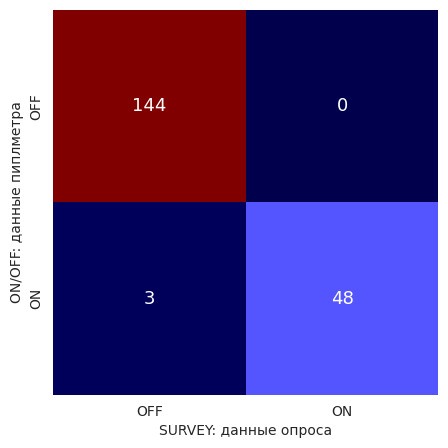

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cm = confusion_matrix(
    in_survey['fact_DeviceState'],
    in_survey['survey_tv_state']
)

plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(cm,
                      cbar=False,
                      square=True,
                      fmt='.0f',
                      annot=True,
                      annot_kws={'size': 13},
                      cmap='seismic',
                      xticklabels=['OFF', 'ON'],
                      yticklabels=['OFF', 'ON'])
heatmap.set_xlabel("SURVEY: данные опроса")
heatmap.set_ylabel("ON/OFF: данные пиплметра")
plt.show()

In [13]:
# Выделение ДХ с количеством 4+ членов семьи больше 1, с фактически включенным телевизором,
## респондент по данным опроса находиться в комнате, регистрации нет.
in_survey_multiple = in_survey[(
    (in_survey['survey_hh_size'] > 1) &
    (in_survey['fact_DeviceState'] == 'ON') &
    (in_survey['survey_display'] == 'в комнате') &
    (in_survey['survey_see'] == 'нет регистрации')
)]

# Получение списка домохозяйств
selected_hh = set(in_survey_multiple.survey_passport)

# Фильтрация по выделенным домохозяйствам
selected_in_survey = in_survey[in_survey['survey_passport'].isin(selected_hh)]

selected_in_survey


,survey_code,survey_passport,survey_button,survey_tv_state,survey_unit,survey_day,survey_cs_start,survey_cs_finish,survey_see,survey_display,survey_hh_size,survey_Begin,survey_End,fact_DeviceState,fact_Begin,fact_End
38,258106,1205697,Б,ON,0,2022-02-07,1900-01-01 16:50:18,1900-01-01 16:53:17,нет регистрации,в комнате,3,2022-02-07 16:50:18,2022-02-07 16:53:17,ON,2022-02-07 10:39:19,2022-02-07 16:55:30
81,258106,1205697,А,ON,0,2022-02-07,1900-01-01 16:50:18,1900-01-01 16:53:17,нет регистрации,нет в комнате,3,2022-02-07 16:50:18,2022-02-07 16:53:17,ON,2022-02-07 10:39:19,2022-02-07 16:55:30
124,258106,1205697,В,ON,0,2022-02-07,1900-01-01 16:50:18,1900-01-01 16:53:17,нет регистрации,в комнате,3,2022-02-07 16:50:18,2022-02-07 16:53:17,ON,2022-02-07 10:39:19,2022-02-07 16:55:30
216,258110,1208135,А,OFF,2,2022-02-09,1900-01-01 14:31:41,1900-01-01 14:33:41,нет регистрации,нет в комнате,2,2022-02-09 14:31:41,2022-02-09 14:33:41,OFF,2022-02-09 13:29:18,2022-02-09 15:21:57
267,258110,1208135,А,ON,1,2022-02-09,1900-01-01 14:31:41,1900-01-01 14:33:41,нет регистрации,нет в комнате,2,2022-02-09 14:31:41,2022-02-09 14:33:41,ON,2022-02-09 08:57:10,2022-02-10 02:00:00
306,258110,1208135,Б,OFF,2,2022-02-09,1900-01-01 14:31:41,1900-01-01 14:33:41,нет регистрации,нет в комнате,2,2022-02-09 14:31:41,2022-02-09 14:33:41,OFF,2022-02-09 13:29:18,2022-02-09 15:21:57
357,258110,1208135,Б,ON,1,2022-02-09,1900-01-01 14:31:41,1900-01-01 14:33:41,нет регистрации,в комнате,2,2022-02-09 14:31:41,2022-02-09 14:33:41,ON,2022-02-09 08:57:10,2022-02-10 02:00:00
1782,258124,1210425,А,ON,0,2022-02-07,1900-01-01 17:57:43,1900-01-01 18:07:25,есть регистрация,в комнате,2,2022-02-07 17:57:43,2022-02-07 18:07:25,ON,2022-02-07 17:01:51,2022-02-07 19:33:01
1876,258124,1210425,А,OFF,1,2022-02-07,1900-01-01 17:57:43,1900-01-01 18:07:25,нет регистрации,нет в комнате,2,2022-02-07 17:57:43,2022-02-07 18:07:25,OFF,2022-02-07 17:15:23,2022-02-07 21:30:08
1922,258124,1210425,А,OFF,2,2022-02-07,1900-01-01 17:57:43,1900-01-01 18:07:25,нет регистрации,нет в комнате,2,2022-02-07 17:57:43,2022-02-07 18:07:25,OFF,2022-02-07 17:40:12,2022-02-07 23:33:37


In [14]:
# Группируем полученный датафрейм по размеру ДХ, идентификатору ДХб, и наличию регистрации. 
selected_in_survey.groupby(['survey_hh_size', 'survey_passport', 'survey_see'])['survey_passport'].nunique()


survey_hh_size  survey_passport  survey_see      
2               1208135          нет регистрации     1
                1210425          есть регистрация    1
                                 нет регистрации     1
3               1205697          нет регистрации     1
4               1210930          есть регистрация    1
                                 нет регистрации     1
Name: survey_passport, dtype: int64

Видим, что есть два домохозяйства, у которого есть и зарегистрированные, и незарегистрированные респонденты.

In [15]:
import sketch
# selected_in_survey.sketch.howto("...")